In [1]:
# NN packages
import jax
import jax.numpy as jnp
import optax
import numpy as np
import json
import os

# Visualization packages
import matplotlib.pyplot as plt

# ML Models
from LNN.models.MDOF_LNN import Physical_Damped_LNN, Modal_MLP

# Helper functions
from LNN.helpers import save_to_file, create_modal_training_data, plot_S_curves, plot_3DS_curves

from lnn_timesim import time_sim_branch, run

In [2]:
# Switch GPUs
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

#### LNN

In [ ]:
FREQUENCY = True
FRC = False

if FREQUENCY:
    filename='frequency_step_frequency_'
    path='LNN/Conx/modal_freq'
    start=10.0
    stop=24.0
    step=0.2
else:
    filename='amplitude_step_amplitude_'
    path='LNN/Conx/modal_amp'
    start=0.1
    stop=2.0
    step=0.1

ml_data = save_to_file(filename=filename, path=path, start=start, stop=stop, step=step, check=True)

train_data, test_data, info = create_modal_training_data(ml_data, path, split=0.2, seed=42)

Data saved to LNN/Conx/modal_freq/data.pkl
Number of files: 71

---EXAMPLE SHAPES---
pose: (2, 301, 39), vel: (2, 301, 39), acc: (2, 301, 39)
If MODAL: 2 Modes, 301 time steps per 39 points along curve
If PHYSICAL: 301 time steps per 39 points along curve
time: (301, 39), F: (39,), T: (39,), force: (2, 301, 39)
Training data shape: (805175, 2, 4), Testing data shape: (207389, 2, 4)
Samples, # of Modes, [x, dx, ddx, force]
x_train.shape: (805175, 2), dx_train.shape: (805175, 2), ddx_train.shape: (805175, 2), force_train.shape: (805175, 2)
x_test.shape: (207389, 2), dx_test.shape: (207389, 2), ddx_test.shape: (207389, 2), force_test.shape: (207389, 2)


In [4]:
mnn_settings = {
    'name': 'MNN',
    'units': 64,
    'layers': 4,
    'input_shape': 4,
    'train_batch_size': 128,
    'test_batch_size': 16,
    'shuffle': True,
    'seed': 69
    }

knn_settings = {
    'name': 'KNN',
    'units': 64,
    'layers': 4,
    'input_shape': 4,
    }

dnn_settings = {
    'name': 'DNN',
    'units': 32,
    'layers': 4,
    'input_shape': 2,
    }

lr = 1e-03
mnn_optimizer = optax.adam(lr)
knn_optimizer = optax.adam(lr)
dnn_optimizer = optax.adam(lr)
epochs = 20
show_every = 10

In [5]:
a = Physical_Damped_LNN(
    mnn_module=Modal_MLP, 
    knn_module=Modal_MLP,       
    dnn_module=Modal_MLP, 
    mnn_settings=mnn_settings,
    knn_settings=knn_settings,
    dnn_settings=dnn_settings, 
    mnn_optimizer=mnn_optimizer, 
    knn_optimizer=knn_optimizer, 
    dnn_optimizer=dnn_optimizer, 
    info=info, 
    activation=jax.nn.tanh)

# Start training LNN
results = None
_, _, _ = a.gather()

In [6]:
results_path = 'MDOF_LNN'
file_name='Modal_freq'
iter_num = 200

epochs = 20
show_every = 10

In [7]:
results = Physical_Damped_LNN.load_model(f"./LNN/{results_path}/{file_name}/Iter_{iter_num}/model.pkl")

In [8]:
pred_acc_, pred_energy = a._predict(results)

#### NOTES:
- $16.0$ Hz doesn't start - to investigate
- $18.6$ Hz fails after a few steps - to investigate

In [ ]:
if not FRC:
    start=5.0
    stop=10.0
    step=0.2
else:   
    start=0.1
    stop=2.0
    step=0.1



Iter Cont     Iter Corr     Residual      Freq          Amp           Energy        Step          Beta          
0             0             2.2306e-03    10.0000       0.1000        0.0000e+00                                
0             1             5.6295e-07    10.0000       0.1000        0.0000e+00                                


/home/aax23/PyCont_release/core/logger.py:201: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.pause(0.01)


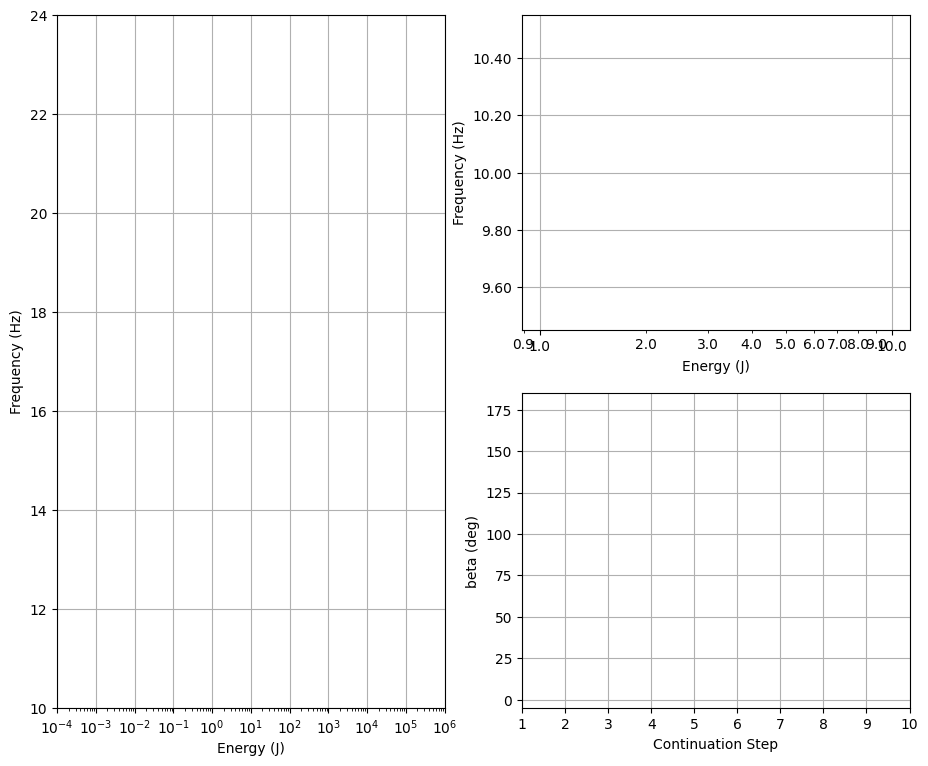

----------------------------------------------------------------------------------------------------------------
1             0             1.4821e-06    10.0100       0.1000        0.0000e+00    -1.000e-04                  
1             1             1.9814e-07    10.0100       0.1000        0.0000e+00    -1.000e-04    0.0033        
----------------------------------------------------------------------------------------------------------------


/home/aax23/PyCont_release/core/logger.py:217: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  self.fig.tight_layout()


2             0             7.1835e-07    10.0242       0.1000        0.0000e+00    -1.414e-04                  
2             1             1.4897e-07    10.0242       0.1000        0.0000e+00    -1.414e-04    0.0051        
----------------------------------------------------------------------------------------------------------------
3             0             1.4107e-06    10.0443       0.1000        0.0000e+00    -2.000e-04                  
3             1             4.2012e-07    10.0443       0.1000        0.0000e+00    -2.000e-04    0.0061        
----------------------------------------------------------------------------------------------------------------
4             0             2.5844e-06    10.0729       0.1000        0.0000e+00    -2.828e-04                  
4             1             2.9095e-07    10.0729       0.1000        0.0000e+00    -2.828e-04    0.0099        
------------------------------------------------------------------------------------------------

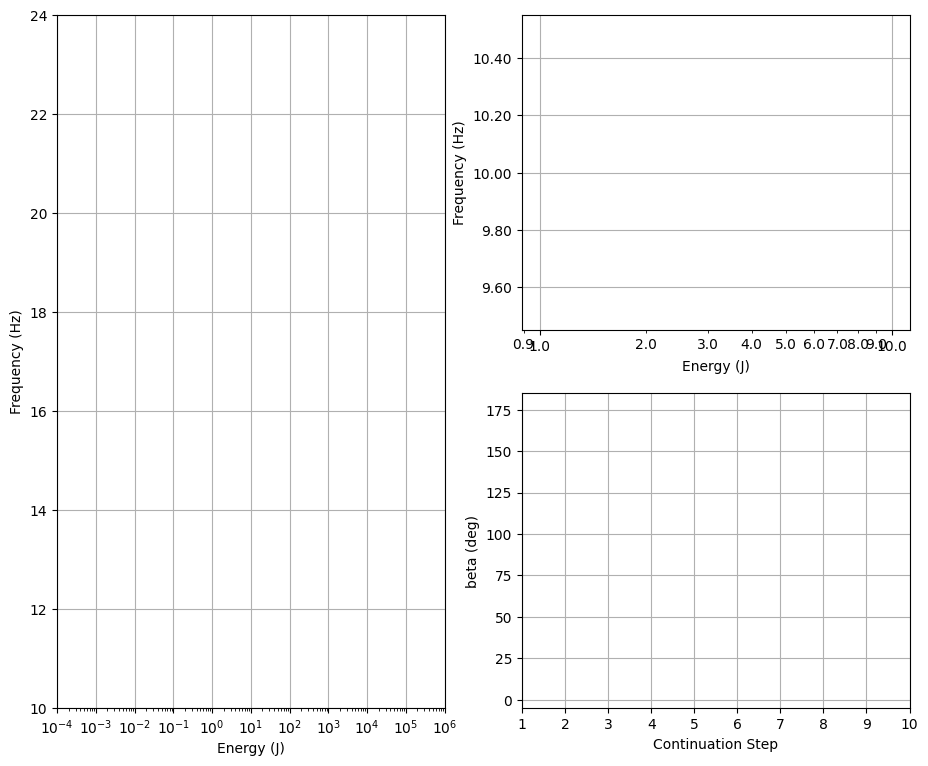

----------------------------------------------------------------------------------------------------------------
1             0             4.4916e-06    10.0100       0.2000        0.0000e+00    -1.000e-04                  
1             1             3.5264e-08    10.0100       0.2000        0.0000e+00    -1.000e-04    0.0068        
----------------------------------------------------------------------------------------------------------------
2             0             2.1424e-06    10.0242       0.2000        0.0000e+00    -1.414e-04                  
2             1             3.8124e-07    10.0241       0.2000        0.0000e+00    -1.414e-04    0.0104        
----------------------------------------------------------------------------------------------------------------
3             0             2.5990e-06    10.0442       0.2000        0.0000e+00    -2.000e-04                  
3             1             1.7504e-07    10.0442       0.2000        0.0000e+00    -2.000e-04  

Exception: Step size below smin, continuation cannot proceed.

In [10]:
# FREQUENCY 
cont_params_file = 'contparameters.json'
if not FRC:
    # S-curves
    for i in np.arange(start, stop+0.1, step):
        # Open contparameters.json
        with open(cont_params_file, 'r') as file:
            data = json.load(file)
            data["continuation"]["continuation_parameter"] = "amplitude"
            # Modify forcing frequency
            data['forcing']['frequency'] = i
            # Save file
            data['Logger']['file_name'] = f'freq_step_{i:.02f}'

        # Modify contparameters.json
        with open(cont_params_file, 'w') as file:
            json.dump(data, file, indent=2)
        
        # Run simulation
        run(pred_acc=pred_acc_)
        
        # Perform time-sim post-processing
        time_sim_branch(file=f'freq_step_{i:.02f}', inplace="-i", run_bif="n", store_physical="n")
else: # FRC
    for i in np.arange(0.1, stop+0.1, step):
        # Open contparameters.json
        with open(cont_params_file, 'r') as file:
            data = json.load(file)
            data["continuation"]["continuation_parameter"] = "frequency"
            # Modify forcing amplitude
            data['forcing']['amplitude'] = i
            # Save file
            data['Logger']['file_name'] = f'amp_step_{i:.02f}'

        # Modify contparameters.json
        with open(cont_params_file, 'w') as file:
            json.dump(data, file, indent=2)
        
        # Run simulation
        run(pred_acc=pred_acc_)
        
        # Perform time-sim post-processing
        time_sim_branch(file=f'amp_step_{i:.02f}', inplace="-i", run_bif="n", store_physical="n")